In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
sales = pd.read_csv("data/source/sales_train.csv")
sales["date"] = sales["date"].apply(lambda x: datetime.strptime(x, "%d.%m.%Y"))
display(sales.head(5))
sales.shape

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


(2935849, 6)

In [3]:
items = pd.read_csv("data/source/items.csv")
cats = pd.read_csv("data/source/item_categories.csv")

items = items.join(cats.set_index("item_category_id"), how="left", on="item_category_id")

items

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
...,...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31,Игры PC - Цифра
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54,Книги - Цифра
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49,Книги - Методические материалы 1С
22168,Яйцо для Little Inu,22168,62,"Подарки - Гаджеты, роботы, спорт"


In [4]:
shops = pd.read_csv("data/source/shops.csv")

shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
# aggregate by month
sales_monthly = sales.groupby(["date_block_num", "shop_id", "item_id"]).agg({
    "item_cnt_day": ["sum", "min", "max", "std"],
    "date": ["min", "max", "count"],
    "item_price": ["mean", "max", "min", "std"]
}).reset_index()

# flatten column names an fill na
sales_monthly.columns = [c[0] if c[1] == "" else c[1] + "_" + c[0] for c in sales_monthly.columns]
sales_monthly = sales_monthly.fillna(0) # should only affect std of breakouts of count 1

# add item and shop metadata
sales_monthly = sales_monthly.join(items.set_index("item_id"), how="left", on="item_id")
sales_monthly = sales_monthly.join(shops.set_index("shop_id"), on="shop_id", how="left")

sales_monthly

,date_block_num,shop_id,item_id,sum_item_cnt_day,min_item_cnt_day,max_item_cnt_day,std_item_cnt_day,min_date,max_date,count_date,mean_item_price,max_item_price,min_item_price,std_item_price,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,6.0,1.0,2.0,0.57735,2013-01-03,2013-01-31,4,221.0,221.0,221.0,0.00000,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1,0,0,33,3.0,1.0,1.0,0.00000,2013-01-03,2013-01-28,3,347.0,347.0,347.0,0.00000,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
2,0,0,35,1.0,1.0,1.0,0.00000,2013-01-31,2013-01-31,1,247.0,247.0,247.0,0.00000,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
3,0,0,43,1.0,1.0,1.0,0.00000,2013-01-31,2013-01-31,1,221.0,221.0,221.0,0.00000,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
4,0,0,51,2.0,1.0,1.0,0.00000,2013-01-13,2013-01-31,2,128.5,130.0,127.0,2.12132,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,6.0,1.0,3.0,1.00000,2015-10-05,2015-10-23,3,119.0,119.0,119.0,0.00000,Элемент питания DURACELL LR03-BC2,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609120,33,59,22088,2.0,1.0,1.0,0.00000,2015-10-03,2015-10-27,2,119.0,119.0,119.0,0.00000,Элемент питания DURACELL LR06-BC2,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609121,33,59,22091,1.0,1.0,1.0,0.00000,2015-10-03,2015-10-03,1,179.0,179.0,179.0,0.00000,Элемент питания DURACELL TURBO LR 03 2*BL,83,Элементы питания,"Ярославль ТЦ ""Альтаир"""
1609122,33,59,22100,1.0,1.0,1.0,0.00000,2015-10-18,2015-10-18,1,629.0,629.0,629.0,0.00000,Энциклопедия Adventure Time,42,"Книги - Артбуки, энциклопедии","Ярославль ТЦ ""Альтаир"""


In [6]:
def plot_series_monthly(shop_id, item_id):
    dateblock_range = list(range(34))
    
    series = sales_monthly.query(
        f"shop_id == {shop_id} and item_id == {item_id}"
    ).sort_values("date_block_num")

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    
    a = [series[series.date_block_num == d].sum_item_cnt_day.values for d in dateblock_range]
    a = [x[0] if len(x) == 1 else 0 for x in a]
    
    ax.plot(
        dateblock_range, 
        a,
        marker="o", 
        linestyle="--"
    )
    
    for v in [9, 21, 33]:
        ax.axvline(v, color="gray", linestyle="--");

56 6111


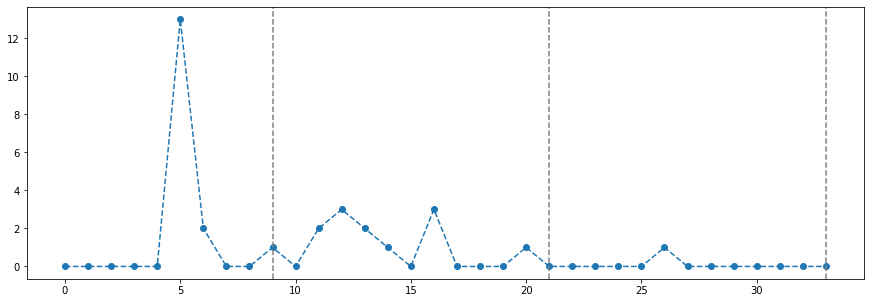

In [7]:
shop_id, item_id = tuple(sales_monthly.sample(n=1)[["shop_id", "item_id"]].values[0])

print(shop_id, item_id)

plot_series_monthly(shop_id, item_id)

In [8]:
sales_monthly.sort_values(by="sum_item_cnt_day", ascending=False)

,date_block_num,shop_id,item_id,sum_item_cnt_day,min_item_cnt_day,max_item_cnt_day,std_item_cnt_day,min_date,max_date,count_date,mean_item_price,max_item_price,min_item_price,std_item_price,item_name,item_category_id,item_category_name,shop_name
1582127,33,12,11373,2253.0,1.0,2169.0,496.549015,2015-10-01,2015-10-29,19,382.224936,1451.000000,0.908714,319.833185,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
1574410,32,55,9249,1644.0,1.0,637.0,149.822777,2015-09-01,2015-09-30,29,1506.993991,1702.825746,1500.000000,37.663795,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",8,Билеты (Цифра),Цифровой склад 1С-Онлайн
1552020,32,12,9248,1644.0,1.0,669.0,151.206128,2015-09-01,2015-09-30,29,1508.318762,1692.526158,1500.000000,36.059112,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",80,Служебные - Билеты,Интернет-магазин ЧС
657943,11,31,20949,1305.0,18.0,81.0,19.102103,2013-12-01,2013-12-31,31,4.998710,5.000000,4.960000,0.007184,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Москва ТЦ ""Семеновский"""
1412964,27,55,3730,1242.0,28.0,231.0,50.132912,2015-04-14,2015-04-30,17,1998.764706,1999.000000,1995.000000,0.970143,"Grand Theft Auto V [PC, Цифровая версия]",31,Игры PC - Цифра,Цифровой склад 1С-Онлайн
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575694,10,12,3732,-4.0,-3.0,1.0,1.505545,2013-11-02,2013-11-29,6,2534.000000,2599.000000,2469.000000,71.203932,"Grand Theft Auto V [PS3, русские субтитры]",19,Игры - PS3,Интернет-магазин ЧС
1026259,19,12,11367,-5.0,-2.0,-1.0,0.577350,2014-08-04,2014-08-12,3,291.666667,375.000000,250.000000,72.168784,Доставка (Клео-Логистик),9,Доставка товара,Интернет-магазин ЧС
11047,0,12,1593,-6.0,-3.0,-1.0,1.000000,2013-01-10,2013-01-26,3,1799.000000,1799.000000,1799.000000,0.000000,"Assassin’s Creed 3. Join or Die Edition [PC, р...",29,Игры PC - Коллекционные издания,Интернет-магазин ЧС
11045,0,12,1590,-13.0,-6.0,-1.0,2.629956,2013-01-10,2013-01-29,4,2599.000000,2599.000000,2599.000000,0.000000,"Assassin’s Creed 3. Freedom Edition [PC, русск...",29,Игры PC - Коллекционные издания,Интернет-магазин ЧС
